## MS 263 In-class problems: Feb. 27 2018



#### 3. Computing vertical gradients

Using data from one station on the West Coast Ocean Acidification cruise, estimate the vertical gradient of nitrate $\Delta N$/$\Delta z$ at locations throughout the water column. Pressure can be used as the vertical coordinate, $z$.

Use Python to make this calculation two different ways:

1. Using a for loop.
2. Not using a for loop.

Make sure that both calculations work for different profiles that have a different number of samples.

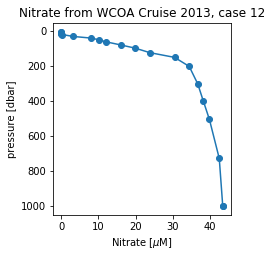

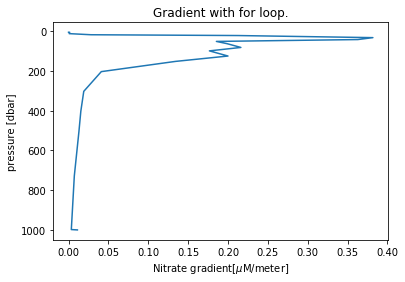

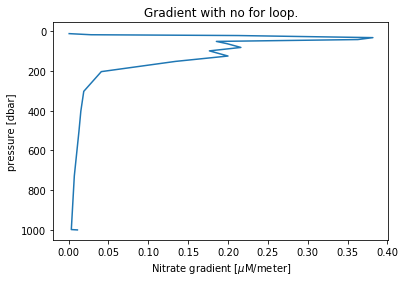

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# you may need to change this, depending on where your data file is
filename = '../hw4-VeloSteve/wcoa_cruise/WCOA2013_hy1.csv' 
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

# Create a new data frame, using only cast number 12
idx = (df['STNNBR'] == 12)
cast = df.loc[idx]

# Plot the data (not gradient) just to see what it looks like.
plt.plot(cast['NITRAT'],cast['CTDPRS'],'-o')
plt.gca().invert_yaxis()
plt.xlabel('Nitrate [$\mu$M]')
plt.ylabel('pressure [dbar]')
plt.title('Nitrate from WCOA Cruise 2013, case 12')
plt.show()
p = np.array(cast['CTDPRS'])
nit = np.array(cast['NITRAT'])

# Initialize an array with nan and calculate the gradient in a for loop.
# I used two points where possible so the results would be centered
# on the corresponding depth value.
gradient = np.ones([len(p)])*np.nan
for i in range(1, len(p)-1):
    gradient[i] = (nit[i+1] - nit[i-1])/(p[i+1] - p[i-1])
gradient[0] =  (nit[1] - nit[0])/(p[1] - p[0])
gradient[-1] =  (nit[-1] - nit[-2])/(p[-1] - p[-2])

# Plot for loop results.
plt.figure()
plt.plot(gradient, p)
plt.gca().invert_yaxis()
plt.xlabel('Nitrate gradient[$\mu$M/meter]')
plt.ylabel('pressure [dbar]')
plt.title('Gradient with for loop.')
plt.show()

# Re-initialize the array and make the same calculation by referencing
# the vectors directly.
gradient = np.ones([len(p)])*np.nan
gradient[1:-2] = (nit[2:-1]-nit[0:-3])/(p[2:-1]-p[0:-3])
gradient[0] = (nit[1]-nit[0])/(p[1]-p[0])
gradient[-1] = (nit[-1]-nit[-2])/(p[-1]-p[-2])

# Plot the non-for results.
plt.figure()
plt.plot(gradient, p)
plt.gca().invert_yaxis()
plt.xlabel('Nitrate gradient [$\mu$M/meter]')
plt.ylabel('pressure [dbar]')
plt.title('Gradient with no for loop.')
plt.show()

#### 4. Plot loop

Create a for loop that loops through the following variables, and plots all available data from the WCOA cruise as a function of pressure (use pressure as the vertical coordinate).

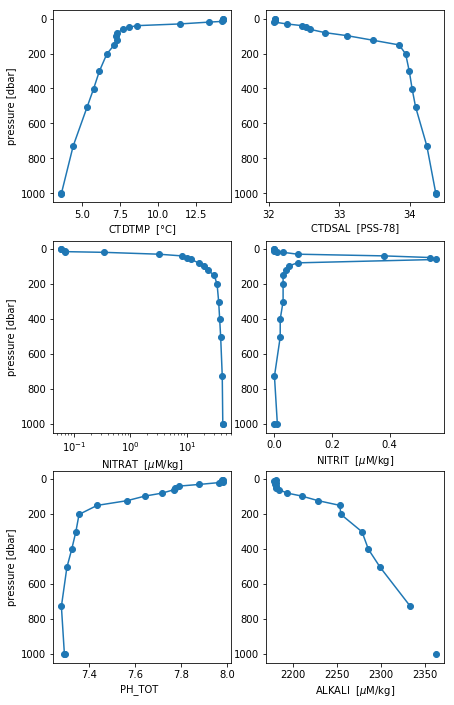

In [18]:
# The default plot size hides axis labels.  Make it bigger.
plt.figure(figsize=[7, 12])

variables_to_plot = ['CTDTMP','CTDSAL','NITRAT','NITRIT','PH_TOT','ALKALI']
# Add units to match the columns above.
units = ['[$\degree$C]', '[PSS-78]', '[$\mu$M/kg]', '[$\mu$M/kg]', '', '[$\mu$M/kg]' ]

# Loop through all 6 variables.
for i, var in enumerate(variables_to_plot):
    # subplot arguments are (rows, columns, plot number)
    plt.subplot(3,2, i+1)
    # Use log if the data does not contain zero and has a wide range.
    if min(cast[var]) > 0 and max(cast[var])/min(cast[var]) > 50:
        plt.semilogx(cast[var],cast['CTDPRS'],'-o', label=var)
    else:
        plt.plot(cast[var],cast['CTDPRS'],'-o', label=var)
    # Y labels on the left only, to reduce crowding.
    if not (i % 2):
        plt.ylabel('pressure [dbar]')
    plt.xlabel(var + '  '+ units[i])
    plt.gca().invert_yaxis()

plt.show()